In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading in Ethereum Fraud Dataset

In [57]:
transaction_df = pd.read_csv('../Data/address_data_k.csv')
transaction_df.head(10)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
5,5,6,0x000895ad78f4403ecd9468900e68d6ee506136fd,0,9900.12,375.48,20926.68,2,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
6,6,7,0x000d63fc5df52b0204374c2f5a3249779805d5d1,0,69.46,629.44,8660.35,25,11,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
7,7,8,0x000e001ab444fa8d6dc4a402f8d7cfc88fe8c64d,0,1497.39,176.84,319828.05,213,5,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,7.0,None,XENON
8,8,9,0x0012cb699c836049a4bbeaac2d8c4d47c688e0e4,0,0.00,0.00,496.62,1,1,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9,9,10,0x0012f247c9f980eea0a9ad06893bfd95c3145794,0,2570.59,3336.01,30572.70,8,3,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,None,AICRYPTO


In [58]:
transaction_df['avg val sent'].unique()

array([1.20068100e+00, 3.28440000e-02, 1.79430800e+00, ...,
       9.16636500e+00, 9.22179000e-01, 6.44427778e+02])

In [59]:
transaction_df.shape

(9841, 51)

In [60]:
transaction_df.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [61]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [62]:
transaction_df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [63]:
transaction_df.nunique()

Unnamed: 0                                              9841
Index                                                   4729
Address                                                 9816
FLAG                                                       2
Avg min between sent tnx                                5013
Avg min between received tnx                            6223
Time Diff between first and last (Mins)                 7810
Sent tnx                                                 641
Received Tnx                                             727
Number of Created Contracts                               20
Unique Received From Addresses                           256
Unique Sent To Addresses                                 258
min value received                                      4589
max value received                                      6302
avg val received                                        6767
min val sent                                            4719
max val sent            

(1449, 51)

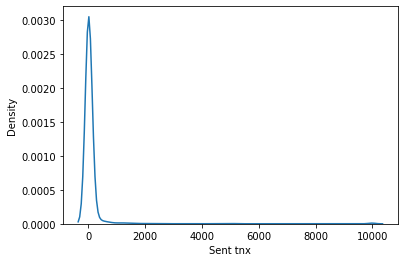

In [64]:
sns.kdeplot(transaction_df['Sent tnx'])
transaction_df[(transaction_df['Sent tnx'] <2) & (transaction_df['FLAG'] == 1)].shape

### Cleaning Dataset
- Removing row data that have NaN values
- Removing colums that are empty/constant values


In [65]:
# Removing NaN values from dataset
transaction_df = transaction_df.dropna()

# Removing columns that are empty
empty_columns = [' ERC20 avg time between contract tnx', ' ERC20 max val sent contract', ' ERC20 min val sent contract', ' ERC20 avg val sent contract', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx']
transaction_df = transaction_df.drop(columns = empty_columns)


### Conducting Correlation Analysis for Feature Reduction

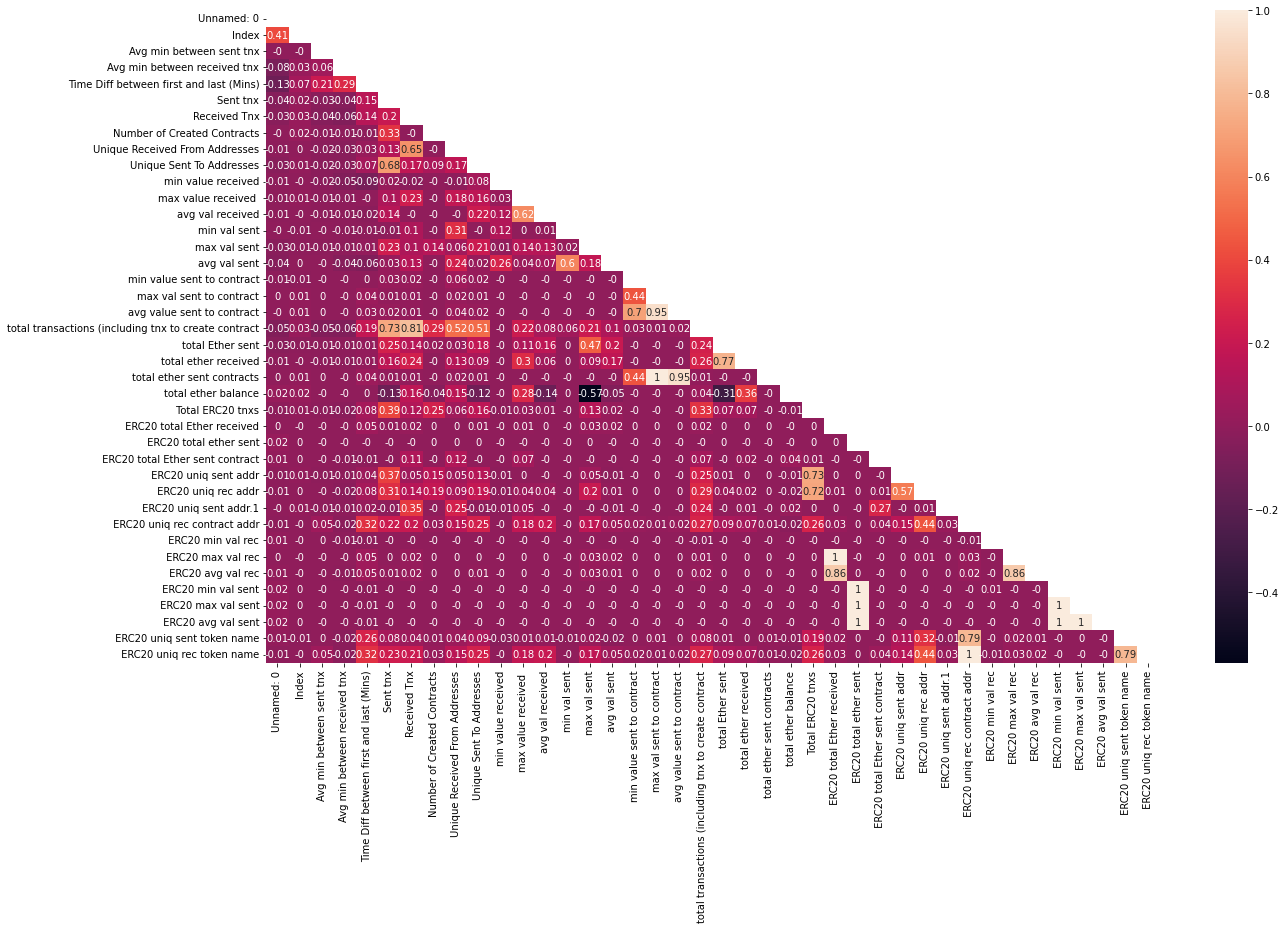

In [66]:
# Removing Flag Label
feature_transaction_df = transaction_df.drop(columns = 'FLAG')

# Plotting Correlation Matrix to see understand which features are highly correlated 
numeric_transaction_df = feature_transaction_df = transaction_df.drop(columns = 'FLAG').select_dtypes(include=np.number) #
corr_matrix = numeric_transaction_df.corr().round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix, mask=mask, annot = True)

# corr_matrix.style.background_gradient(cmap='coolwarm')
plt.show()

In [67]:
# Finding correlations that are above 0.7
correlation_threshold = 0.7
reduced_corr_matrix = corr_matrix.mask(mask)
corr_matrix_unstacked = reduced_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= correlation_threshold].reset_index().rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature_1,feature_2,Absolute Correlation
15,ERC20 uniq rec contract addr,ERC20 uniq rec token name,1.00
19,ERC20 max val sent,ERC20 avg val sent,1.00
4,max val sent to contract,total ether sent contracts,1.00
18,ERC20 min val sent,ERC20 avg val sent,1.00
17,ERC20 min val sent,ERC20 max val sent,1.00
9,ERC20 total Ether received,ERC20 max val rec,1.00
11,ERC20 total ether sent,ERC20 min val sent,1.00
12,ERC20 total ether sent,ERC20 max val sent,1.00
13,ERC20 total ether sent,ERC20 avg val sent,1.00
3,max val sent to contract,avg value sent to contract,0.95


In [69]:
# Doing Dimensionality Reduction 
erc20_dim_red_df = transaction_df[[' ERC20 total Ether received', ' ERC20 avg val sent', ' ERC20 max val rec', 
                ' ERC20 total ether sent', ' ERC20 avg val rec', ' ERC20 max val sent']]

erc20_dim_red_df

,ERC20 total Ether received,ERC20 avg val sent,ERC20 max val rec,ERC20 total ether sent,ERC20 avg val rec,ERC20 max val sent
0,3.558854e+07,271779.920000,1.500000e+07,3.560317e+07,265586.147600,1.683100e+07
1,4.034283e+02,2.260809,3.650000e+02,2.260809e+00,57.632615,2.260809e+00
2,5.215121e+02,0.000000,4.428198e+02,0.000000e+00,65.189009,0.000000e+00
3,1.711105e+04,3804.076893,1.141223e+04,1.141223e+04,1555.550174,9.029231e+03
4,1.628297e+05,13726.659220,9.000000e+04,1.235399e+05,4934.232147,4.500000e+04
...,...,...,...,...,...,...
9832,1.337000e+01,0.000000,1.337000e+01,0.000000e+00,6.685000,0.000000e+00
9836,1.337000e+00,0.000000,1.337000e+00,0.000000e+00,0.668500,0.000000e+00
9837,1.337000e+01,0.000000,1.337000e+01,0.000000e+00,13.370000,0.000000e+00
9838,1.503470e+03,0.000000,1.500000e+03,0.000000e+00,300.693901,0.000000e+00


In [70]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_erc20_data = scaler.fit_transform(erc20_dim_red_df)


pca_2 = PCA(n_components=2)
pca_2_features = pca_2.fit_transform(scaled_erc20_data)


In [71]:
model = TSNE(learning_rate=50)
tsne_features = model.fit_transform(pca_2_features)
tsne_features

C:\Users\alvin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


array([[ 47.329155, -15.412254],
       [-44.201534,  27.542788],
       [-41.210316,  32.159866],
       ...,
       [-23.68496 , -32.27102 ],
       [-22.189482,  44.898903],
       [  8.977572,  37.542408]], dtype=float32)

In [72]:
tsne_features[1:4, :]

array([[-44.201534,  27.542788],
       [-41.210316,  32.159866],
       [ 17.331036,  23.16279 ]], dtype=float32)

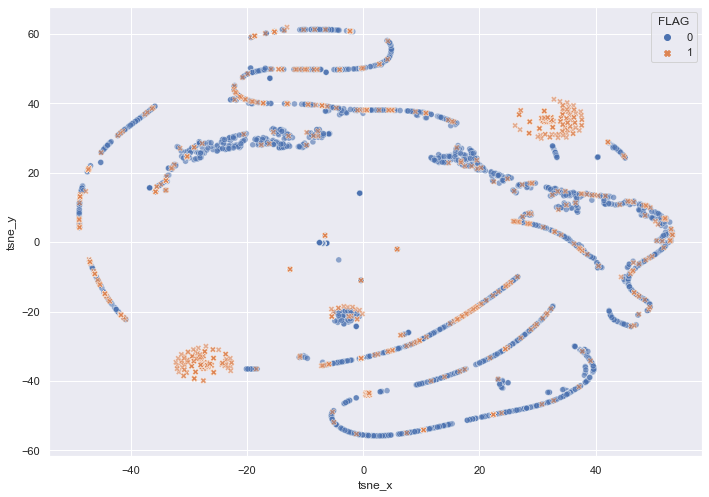

In [73]:
import seaborn as sns

transaction_df['tsne_x'] = tsne_features[:,0]
transaction_df['tsne_y'] = tsne_features[:,1]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='tsne_x',y='tsne_y',data=transaction_df,alpha=0.6,hue='FLAG',style='FLAG')
plt.show()